In [22]:
import numpyro as npy
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

The model to implement is

$$y_t = y_{t-1} + \mu + \nu_t + \theta \nu_{t-1}$$

with

$$\nu_t \sim N(0, \sigma_\nu^2)$$

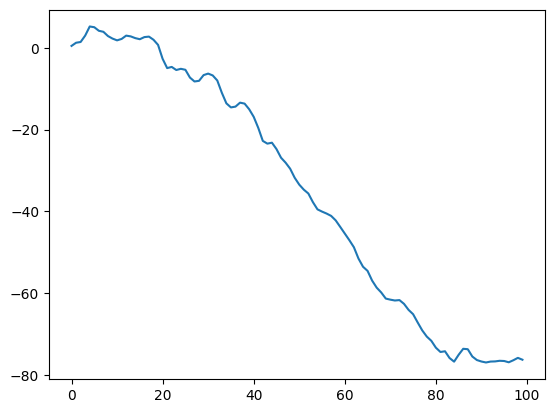

In [20]:
def generate_ma1_data(T, mu, theta, sigma_nu, seed=0):
    np.random.seed(seed)
    nu = np.random.normal(0, sigma_nu, T)
    y = np.zeros(T)
    y[0] = mu + nu[0]
    for t in range(1, T):
        y[t] = y[t-1] + mu + nu[t] + theta * nu[t-1]
    return y

T = 100
mu = -0.85
sigma_nu = 0.75
theta = 1.0
data = generate_ma1_data(T, mu, theta, sigma_nu)
plt.plot(data);

In [ ]:
def ma1_with_drift_model(y):
    T = len(y)
    mu = npy.sample("mu", npy.distributions.Normal(0., 2.))
    theta = npy.sample("theta", npy.distributions.Normal(0., 1.))
    sigma_nu = npy.sample("sigma_nu", npy.distributions.HalfNormal(2.))
    
    with npy.plate("sigma_nus", T):
        nu = npy.sample("nu", npy.distributions.Normal(0., sigma_nu))
    
    means = jnp.roll(y, 1) + mu + nu[1:] + theta * nu[:-1]
    means = means.at[0].set(mu + nu[1])
    
    # Use deterministic instead of sampling with tiny noise
    numpyro.deterministic("y_pred", means)
    
    # Assert that observations exactly match predictions
    assert jnp.allclose(y, means)    means = jnp.roll(y, 1) + mu + nu[1:] + theta * nu[:-1]
    means = means.at[0].set(mu + nu[1])
    
    # Use deterministic instead of sampling with tiny noise
    numpyro.deterministic("y_pred", means)
    
    # Assert that observations exactly match predictions
    assert jnp.allclose(y, means)
